# H1B Petition Raw Data Loading

In [58]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [60]:
#importing all the packages required for analysis
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import svm
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.linear_model as linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import difflib as dff
%matplotlib inline

In [61]:
## import the data fill
input_file = "H1B_Cleaned_data.csv"
print(input_file)

H1B_Cleaned_data.csv


In [62]:
## read the data file into a dataframe
dataframe1 = pd.read_table(input_file, encoding="ISO-8859-1", sep = ',')

In [63]:
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None
len(dataframe1)

2068225

In [64]:
dataframe1.isnull().any()
#u_emp=dataframe1.EMPLOYER_NAME.unique()

Key                   False
CASE_STATUS            True
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION     True
PREVAILING_WAGE        True
YEAR                   True
WORKSITE              False
CITY                   True
COUNTRY                True
lon                    True
lat                    True
dtype: bool

In [65]:
#print(dataframe1.loc[dataframe1['Key']==737430])
#values=dataframe1['EMPLOYER_NAME'].isnull().values.any(axis=1)
#print(values)
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#df=dataframe1[dataframe1.isnull().any(axis=1)]
#print(df[['Key','EMPLOYER_NAME']])
dataframe1.dropna(subset=['EMPLOYER_NAME','SOC_NAME','JOB_TITLE','COUNTRY'], inplace=True)

In [66]:
len(dataframe1)

2052232

In [67]:
dataframe1.isnull().any()

Key                   False
CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME              False
JOB_TITLE             False
FULL_TIME_POSITION     True
PREVAILING_WAGE        True
YEAR                  False
WORKSITE              False
CITY                   True
COUNTRY               False
lon                    True
lat                    True
dtype: bool

In [68]:
dataframe1.describe()

,Key,PREVAILING_WAGE,YEAR,lon,lat
count,2.052232e+06,2.052173e+06,2.052232e+06,1.956704e+06,1.956704e+06
mean,1.558976e+06,1.796561e+05,2.013742e+03,-9.230948e+01,3.809973e+01
std,8.694408e+05,6.341975e+06,1.700149e+00,1.843172e+01,4.613887e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.820135e+01
25%,7.830188e+05,5.403840e+04,2.012000e+03,-1.119261e+02,3.417056e+01
50%,1.591692e+06,6.606100e+04,2.014000e+03,-8.615807e+01,3.905582e+01
75%,2.314896e+06,8.374100e+04,2.015000e+03,-7.553979e+01,4.086529e+01
max,3.002444e+06,6.997607e+09,2.016000e+03,-6.610574e+01,6.483778e+01


# Preliminary Data Analysis and Preprocessing

Analaysis #1 

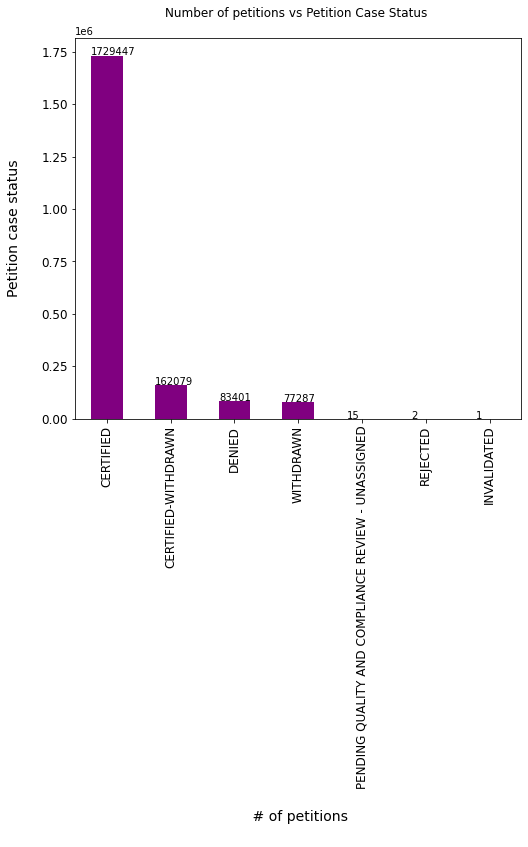

CERTIFIED                                             1729447
CERTIFIED-WITHDRAWN                                    162079
DENIED                                                  83401
WITHDRAWN                                               77287
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64


In [69]:
# Plotting a graph case status against Number of petition
Status_petition_plot = dataframe1['CASE_STATUS'].value_counts().plot(title = 'Number of petitions vs Petition Case Status \n',kind = 'bar', fontsize=12, color = 'purple',linewidth=2.0, figsize = (8, 7))
Status_petition_plot.set_ylabel("Petition case status\n", fontsize=14)
Status_petition_plot.set_xlabel("\n # of petitions\n", fontsize=14)
# Plots the graph

for p in Status_petition_plot.patches:
    Status_petition_plot.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()
# Display the table
print(dataframe1['CASE_STATUS'].value_counts())

In [70]:
# Creating a temprary dataframe for only Certified, Denied and rejected cases
Temp_dataframe = dataframe1.loc[dataframe1['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]
#Temp_dataframe=Temp_dataframe.sort_values(by=['YEAR'], ascending=True)
Temp_dataframe.head(5)

,Key,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,CITY,COUNTRY,lon,lat
18,19,CERTIFIED,QUICKLOGIXLLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016.0,"SANTA CLARA, CALIFORNIA",SANTA CLARA,CALIFORNIA,-121.955236,37.354108
19,20,CERTIFIED,MCCHRYSTALGROUPLLC,CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.0,2016.0,"ALEXANDRIA, VIRGINIA",ALEXANDRIA,VIRGINIA,-77.046921,38.804835
21,23,CERTIFIED,LOMICSLLC,CHIEF EXECUTIVES,CEO,Y,99986.0,2016.0,"SAN DIEGO, CALIFORNIA",SAN DIEGO,CALIFORNIA,-117.161084,32.715738
22,24,CERTIFIED,UCUNIVERSITYHIGHSCHOOLEDUCATIONINC,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016.0,"CHULA VISTA, CALIFORNIA",CHULA VISTA,CALIFORNIA,-117.084196,32.640054
24,26,CERTIFIED,QUICKLOGIXINC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016.0,"SANTA CLARA, CALIFORNIA",SANTA CLARA,CALIFORNIA,-121.955236,37.354108


In [71]:
#datatype conversion and upper case formatting
Temp_dataframe['YEAR'] = Temp_dataframe['YEAR'].astype(int)
Temp_dataframe['EMPLOYER_NAME'] = Temp_dataframe['EMPLOYER_NAME'].str.upper()
Temp_dataframe['SOC_NAME'] = Temp_dataframe['SOC_NAME'].str.upper()
Temp_dataframe['JOB_TITLE'] = Temp_dataframe['JOB_TITLE'].str.upper()
Temp_dataframe['FULL_TIME_POSITION'] = Temp_dataframe['FULL_TIME_POSITION'].str.upper()

In [72]:
Temp_dataframe.head(5)

,Key,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,CITY,COUNTRY,lon,lat
18,19,CERTIFIED,QUICKLOGIXLLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",SANTA CLARA,CALIFORNIA,-121.955236,37.354108
19,20,CERTIFIED,MCCHRYSTALGROUPLLC,CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.0,2016,"ALEXANDRIA, VIRGINIA",ALEXANDRIA,VIRGINIA,-77.046921,38.804835
21,23,CERTIFIED,LOMICSLLC,CHIEF EXECUTIVES,CEO,Y,99986.0,2016,"SAN DIEGO, CALIFORNIA",SAN DIEGO,CALIFORNIA,-117.161084,32.715738
22,24,CERTIFIED,UCUNIVERSITYHIGHSCHOOLEDUCATIONINC,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016,"CHULA VISTA, CALIFORNIA",CHULA VISTA,CALIFORNIA,-117.084196,32.640054
24,26,CERTIFIED,QUICKLOGIXINC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",SANTA CLARA,CALIFORNIA,-121.955236,37.354108


<AxesSubplot:title={'center':'CASE STATUS vs # OF PETITIONS \n '}, xlabel='\n CASE STATUS', ylabel='NUMBER OF PETITIONS \n'>

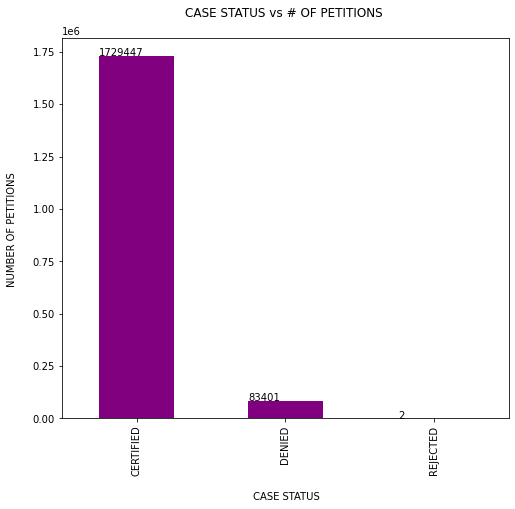

In [73]:
plot_status_petitions = Temp_dataframe['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs # OF PETITIONS \n ',kind = 'bar', color = 'purple', figsize = (8, 7))
plot_status_petitions.set_xlabel("\n CASE STATUS")
plot_status_petitions.set_ylabel("NUMBER OF PETITIONS \n")
for p in plot_status_petitions.patches:
    plot_status_petitions.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.000))
plot_status_petitions

Analysis #2

 Top 10 Employers filing for petition 
 
INFOSYSLIMITED                               26395
IBMINDIAPRIVATELIMITED                       20723
WIPROLIMITED                                 19115
TATACONSULTANCYSERVICESLIMITED               17950
DELOITTECONSULTINGLLP                        16764
ACCENTURELLP                                 15466
HCLAMERICAINC                                12067
TECHMAHINDRAAMERICASINC                      10800
IBMCORPORATION                                9723
COGNIZANTTECHNOLOGYSOLUTIONSUSCORPORATION     9120
Name: EMPLOYER_NAME, dtype: int64


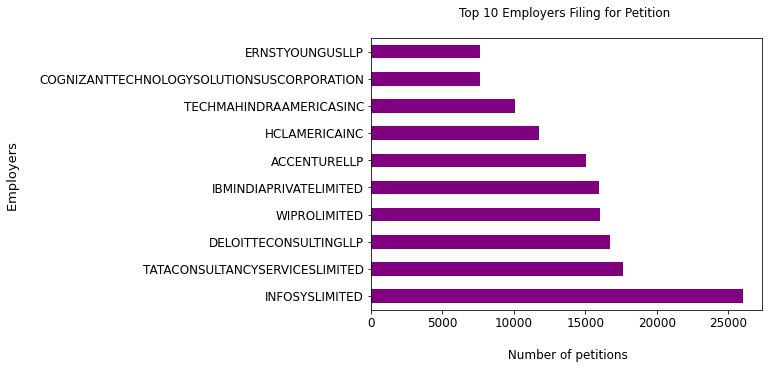

In [74]:
print(" Top 10 Employers filing for petition \n ")
Top_employers_filing_for_petition= Temp_dataframe['EMPLOYER_NAME'].value_counts().head(10).plot.barh(title = "Top 10 Employers Filing for Petition \n", \
                                                                 fontsize=12, color = 'purple',linewidth=2.0, figsize = (7, 5))
Top_employers_filing_for_petition.set_ylabel("Employers \n",fontsize=13)
Top_employers_filing_for_petition.set_xlabel("\n Number of petitions",fontsize=12)
Top_employers_filing_for_petition
print(dataframe1['EMPLOYER_NAME'].value_counts().head(10))


Analysis #3

Top 10 Positions in demand for H1B 

Computer Systems Analysts                    173895
SOFTWARE DEVELOPERS, APPLICATIONS            138307
Software Developers, Applications            136994
Computer Programmers                         134081
COMPUTER SYSTEMS ANALYSTS                    115682
COMPUTER PROGRAMMERS                          80016
COMPUTER OCCUPATIONS, ALL OTHER               62853
Computer Occupations, All Other               42677
Software Developers, Systems Software         30997
Management Analysts                           29754
Financial Analysts                            27277
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE         25622
Computer Software Engineers, Applications     25182
Accountants and Auditors                      24592
Mechanical Engineers                          22152
Name: SOC_NAME, dtype: int64


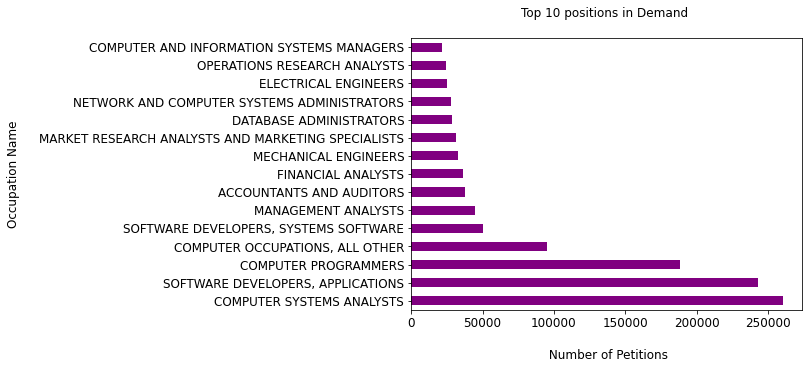

In [75]:
print("Top 10 Positions in demand for H1B \n")
top10_occupation_demading_for_H1B= Temp_dataframe['SOC_NAME'].value_counts().head(15).plot.barh(title = "Top 10 positions in Demand \n", \
                                                                 fontsize=12, color = 'purple',linewidth=2.0, figsize = (7, 5))
top10_occupation_demading_for_H1B.set_ylabel("Occupation Name\n ",fontsize=12)
top10_occupation_demading_for_H1B.set_xlabel("\n Number of Petitions",fontsize=12)
top10_occupation_demading_for_H1B
print(dataframe1['SOC_NAME'].value_counts().head(15))

Analysis #4

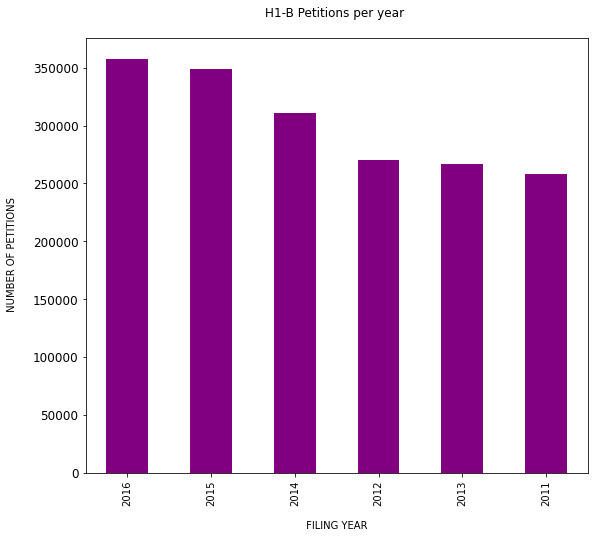

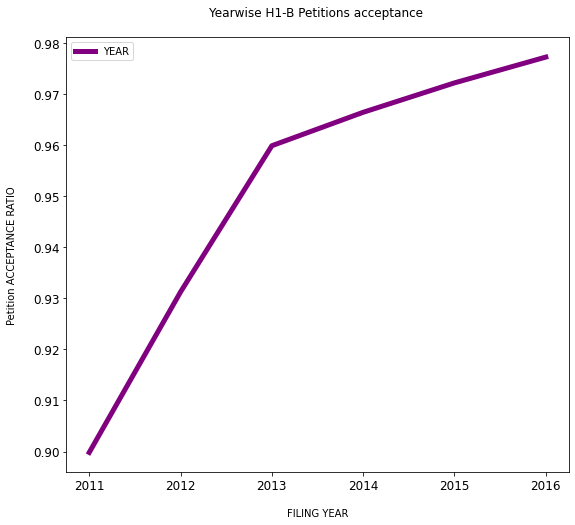

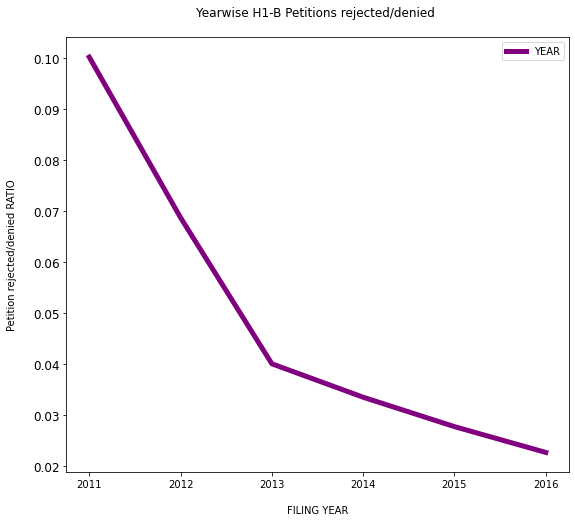

In [76]:
# Number of petitions evry year
#without sorting
yearwise_petition_plot=Temp_dataframe['YEAR'].value_counts().plot(title = "H1-B Petitions per year \n",\
                                                                kind='bar', fontsize=12, color = 'purple',linewidth=5,figsize = (9,8))
yearwise_petition_plot.set_xlabel('\n FILING YEAR ')
yearwise_petition_plot.set_ylabel(' NUMBER OF PETITIONS\n')
yearwise_petition_plot.tick_params(axis='x', which='major', labelsize=5)

                                  
#petition acceptance ratio per year
yearwise_acceptance_plot = pd.DataFrame(Temp_dataframe[Temp_dataframe['CASE_STATUS'] == 'CERTIFIED'].YEAR.value_counts() / Temp_dataframe.YEAR.value_counts())
yearwise_acceptance_plot = yearwise_acceptance_plot.sort_values(['YEAR'])
yearwise_acceptance_plot = yearwise_acceptance_plot.plot(title = 'Yearwise H1-B Petitions acceptance \n', kind = 'line', fontsize=12, color = 'purple',linewidth=5, figsize = (9, 8))
yearwise_acceptance_plot.set_xlabel('\nFILING YEAR')
yearwise_acceptance_plot.set_ylabel('Petition ACCEPTANCE RATIO\n')
yearwise_petition_plot.tick_params(axis='x', which='major', labelsize=10)
plt.show()

#petition acceptance ratio per year
yearwise_rejection_plot = pd.DataFrame(Temp_dataframe[Temp_dataframe['CASE_STATUS'] != 'CERTIFIED'].YEAR.value_counts() / Temp_dataframe.YEAR.value_counts())
yearwise_rejection_plot = yearwise_rejection_plot.sort_values(['YEAR'])
yearwise_rejection_plot = yearwise_rejection_plot.plot(title = 'Yearwise H1-B Petitions rejected/denied \n', kind = 'line', fontsize=12, color = 'purple',linewidth=5, figsize = (9, 8))
yearwise_rejection_plot.set_xlabel('\nFILING YEAR')
yearwise_rejection_plot.set_ylabel('Petition rejected/denied RATIO\n')
yearwise_rejection_plot.tick_params(axis='x', which='major', labelsize=10)
plt.show()

Analysis #5

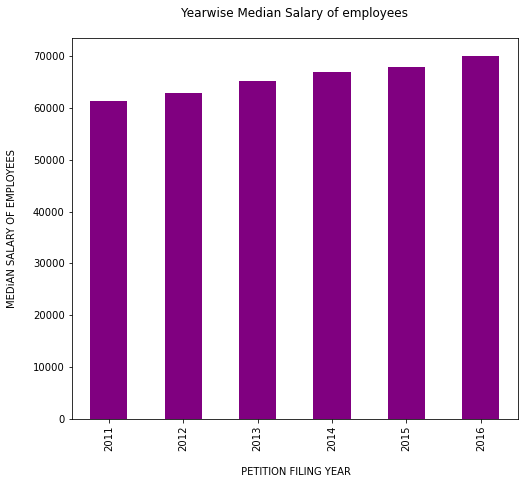

<AxesSubplot:title={'center':'Yearwise Median Salary of employees\n'}, xlabel='\n PETITION FILING YEAR', ylabel='MEDiAN SALARY OF EMPLOYEES\n'>

In [77]:
# Median salary per year
Salary_vs_year = Temp_dataframe.loc[:,['PREVAILING_WAGE', 'YEAR']].groupby(['YEAR']).agg(['median'])

Salary_vs_year = Salary_vs_year.plot(title='Yearwise Median Salary of employees\n',kind = 'bar', color = 'purple', legend = None, figsize = (8, 7))
Salary_vs_year.set_xlabel('\n PETITION FILING YEAR')
Salary_vs_year.set_ylabel('MEDiAN SALARY OF EMPLOYEES\n')
plt.show()
Salary_vs_year

# Feature Encoding

# Filter to keep only  'CERTIFIED' or 'DECLINED' case status

In [78]:
print(Temp_dataframe['CASE_STATUS'].unique())
Temp_dataframe = Temp_dataframe.loc[Temp_dataframe['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])] #filtering
print(Temp_dataframe['CASE_STATUS'].unique())

['CERTIFIED' 'DENIED' 'REJECTED']
['CERTIFIED' 'DENIED']


In [79]:
Temp_dataframe.isnull().sum(axis = 0)

Key                       0
CASE_STATUS               0
EMPLOYER_NAME             0
SOC_NAME                  0
JOB_TITLE                 0
FULL_TIME_POSITION        1
PREVAILING_WAGE          49
YEAR                      0
WORKSITE                  0
CITY                    124
COUNTRY                   0
lon                   86096
lat                   86096
dtype: int64

In [80]:
Temp_dataframe1 = Temp_dataframe
print(Temp_dataframe.shape)
print(Temp_dataframe1.shape)

(1812848, 13)
(1812848, 13)


In [81]:
Temp_dataframe1.CASE_STATUS.value_counts()

CERTIFIED    1729447
DENIED         83401
Name: CASE_STATUS, dtype: int64

In [82]:
Temp_dataframe1_denied = Temp_dataframe1[Temp_dataframe1['CASE_STATUS'] == 'DENIED']

In [83]:
Temp_dataframe1_certified = Temp_dataframe1[Temp_dataframe1['CASE_STATUS'] == 'CERTIFIED']

In [84]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = \
train_test_split(Temp_dataframe1[Temp_dataframe1.CASE_STATUS == 'CERTIFIED'],Temp_dataframe1_certified.CASE_STATUS, train_size= 0.06, random_state=1)

In [85]:
training_df = Input_Certified.append(Temp_dataframe1_denied)

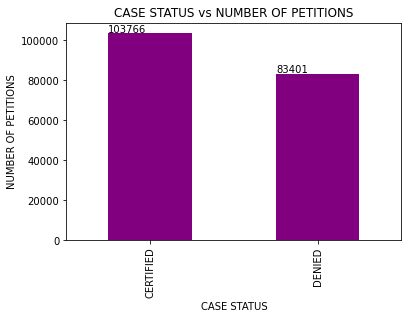

In [86]:
## plot the distribution of the certified and denied samples after downsampling
plot_after_ds = training_df['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'purple')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

#converting the categorical data into numerical categories, This is achieved by identifying the unique values of the columns

In [87]:
# one-hot encoding for every possible and needed column
print("Dataframe with confirmed or denied cases :\n ")
print("*******************************************")
print(training_df.info())
print("*******************************************")
print("Unique values count of each columns :\n")
print("Case Status ",training_df.CASE_STATUS.nunique())
print("Unique Employers ",training_df.EMPLOYER_NAME.nunique())
print("Unique SOCs ", training_df.SOC_NAME.nunique())
print("Unique Job Titles ",training_df.JOB_TITLE.nunique())
print("Unique Employment Type ", training_df.FULL_TIME_POSITION.nunique())
print("Prevailing Wages ",training_df.PREVAILING_WAGE.nunique())
print("Unique Year ",training_df.YEAR.nunique())
print("Unique Worksite State ",training_df.WORKSITE.nunique())
print("Unique CITY State ",training_df.CITY.nunique())
print("Unique COUNTRY State ",training_df.COUNTRY.nunique())


Dataframe with confirmed or denied cases :
 
*******************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 187167 entries, 1282510 to 2068166
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Key                 187167 non-null  int64  
 1   CASE_STATUS         187167 non-null  object 
 2   EMPLOYER_NAME       187167 non-null  object 
 3   SOC_NAME            187167 non-null  object 
 4   JOB_TITLE           187167 non-null  object 
 5   FULL_TIME_POSITION  187166 non-null  object 
 6   PREVAILING_WAGE     187118 non-null  float64
 7   YEAR                187167 non-null  int64  
 8   WORKSITE            187167 non-null  object 
 9   CITY                187141 non-null  object 
 10  COUNTRY             187167 non-null  object 
 11  lon                 174772 non-null  float64
 12  lat                 174772 non-null  float64
dtypes: float64(3), int64(2), object(8)
mem

# Categorzing the Features

In [88]:
def Prevailing_wage_categorization(prevailing_wage):
    if prevailing_wage <=50000:
        return "VERY LOW"
    elif prevailing_wage >50000 and prevailing_wage <= 70000:
        return "LOW"
    elif prevailing_wage >70000 and prevailing_wage <= 90000:
        return "MEDIUM"
    elif prevailing_wage >90000 and prevailing_wage<=150000:
        return "HIGH"
    elif prevailing_wage >=150000:
        return "VERY HIGH"
    
def Grant_status_Categorization(acceptance_ratio):
    if acceptance_ratio == -1:
        return "AR"
    elif acceptance_ratio >=0.0 and acceptance_ratio<0.20:
        return "VLA"
    elif acceptance_ratio>=0.20 and acceptance_ratio<0.40:
        return "LA"
    elif acceptance_ratio>=0.40 and acceptance_ratio<0.60:
        return "MA"
    elif acceptance_ratio>=0.60 and acceptance_ratio<0.80:
        return "HA"
    elif acceptance_ratio>=0.80:
        return "VHA"
def worksite_collector(worksite):
    return worksite.split(', ')[1]

Feature Creation, One Hot Encoding to convert the categorical field for wage, employer, soc and job

In [89]:
training_df['WORKSITE'] = training_df['WORKSITE'].apply(worksite_collector)
training_df.WORKSITE.unique()

array(['NEW HAMPSHIRE', 'VIRGINIA', 'MICHIGAN', 'CALIFORNIA', 'TEXAS',
       'ALASKA', 'ILLINOIS', 'CONNECTICUT', 'NEW YORK', 'OHIO', 'GEORGIA',
       'NEW JERSEY', 'NORTH CAROLINA', 'MASSACHUSETTS', 'COLORADO',
       'WEST VIRGINIA', 'OREGON', 'MISSOURI', 'IOWA', 'RHODE ISLAND',
       'PENNSYLVANIA', 'ARIZONA', 'FLORIDA', 'WASHINGTON', 'OKLAHOMA',
       'NEBRASKA', 'ALABAMA', 'TENNESSEE', 'MARYLAND', 'KENTUCKY',
       'DELAWARE', 'NEVADA', 'INDIANA', 'SOUTH CAROLINA',
       'DISTRICT OF COLUMBIA', 'MINNESOTA', 'NEW MEXICO', 'WISCONSIN',
       'LOUISIANA', 'ARKANSAS', 'VERMONT', 'MISSISSIPPI', 'SOUTH DAKOTA',
       'KANSAS', 'IDAHO', 'HAWAII', 'MAINE', 'UTAH', 'MONTANA',
       'PUERTO RICO', 'WYOMING', 'NORTH DAKOTA'], dtype=object)

In [90]:
training_df['PREVAILING_WAGE_CATEGORY'] = training_df['PREVAILING_WAGE'].apply(Prevailing_wage_categorization)
training_df['PREVAILING_WAGE_CATEGORY']

1282510      MEDIUM
1669038        HIGH
2027675        HIGH
1382117    VERY LOW
553826          LOW
             ...   
2068143    VERY LOW
2068144         LOW
2068146    VERY LOW
2068158         LOW
2068166         LOW
Name: PREVAILING_WAGE_CATEGORY, Length: 187167, dtype: object

In [91]:
employer_tdf = training_df.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
soc_tdf = training_df.loc[:,['SOC_NAME', 'CASE_STATUS']]
job_tdf = training_df.loc[:,['JOB_TITLE', 'CASE_STATUS']]
print(employer_tdf)

                         EMPLOYER_NAME CASE_STATUS
1282510                 DATAGRAVITYINC   CERTIFIED
1669038          HEWLETTPACKARDCOMPANY   CERTIFIED
2027675           UNIVERSITYOFMICHIGAN   CERTIFIED
1382117               DIOCESEOFSANJOSE   CERTIFIED
553826                          ARMINC   CERTIFIED
...                                ...         ...
2068143                PARKSASSOCIATES      DENIED
2068144  OREGONHEALTHSCIENCEUNIVERSITY      DENIED
2068146                   CUSTOMTBTLLC      DENIED
2068158            IVERTIXINCORPORATED      DENIED
2068166    PEIPARTNERSHIPARCHITECTSLLP      DENIED

[187167 rows x 2 columns]


In [92]:
certified_employer_tdf = employer_tdf[employer_tdf.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
certified_soc_tdf = soc_tdf[soc_tdf.CASE_STATUS == 'CERTIFIED'].SOC_NAME
certified_job_tdf = job_tdf[job_tdf.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
confirmed_employer_count = certified_employer_tdf.value_counts()
confirmed_SOC_count = certified_soc_tdf.value_counts()
confirmed_job_count = certified_job_tdf.value_counts()

In [93]:
total_employer_counts = employer_tdf.EMPLOYER_NAME.value_counts()
total_soc_counts = soc_tdf.SOC_NAME.value_counts()
total_job_counts = job_tdf.JOB_TITLE.value_counts()

In [94]:
ratio_final = confirmed_employer_count / total_employer_counts
ratio_final.fillna(-1, inplace=True)
employer_classification_final = ratio_final.apply(Grant_status_Categorization)
training_df['EMPLOYER_ACCEPTANCE'] = training_df.EMPLOYER_NAME.map(employer_classification_final)

In [95]:
ratio_final_soc = confirmed_SOC_count / total_soc_counts
ratio_final_soc.fillna(-1, inplace=True)
soc_classification_final = ratio_final_soc.apply(Grant_status_Categorization)
training_df['SOC_ACCEPTANCE'] = training_df.SOC_NAME.map(soc_classification_final)

In [96]:
ratio_final_job = confirmed_job_count / total_job_counts
ratio_final_job.fillna(-1, inplace=True)
job_classification_final = ratio_final_job.apply(Grant_status_Categorization)
training_df['JOB_ACCEPTANCE'] = training_df.JOB_TITLE.map(job_classification_final)

In [97]:
print("*******************************************")
print("Unique values count of each columns :\n")
print("Case Status ",training_df.CASE_STATUS.nunique())
print("Unique Employers ",training_df.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_df.PREVAILING_WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_df.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_df.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_df.YEAR.nunique())
print("Unique Worksite State ",training_df.WORKSITE.nunique())
print("Unique Employment Type ", training_df.FULL_TIME_POSITION.nunique())
print("*******************************************")
training_df.info()

*******************************************
Unique values count of each columns :

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  52
Unique Employment Type  2
*******************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 187167 entries, 1282510 to 2068166
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Key                       187167 non-null  int64  
 1   CASE_STATUS               187167 non-null  object 
 2   EMPLOYER_NAME             187167 non-null  object 
 3   SOC_NAME                  187167 non-null  object 
 4   JOB_TITLE                 187167 non-null  object 
 5   FULL_TIME_POSITION        187166 non-null  object 
 6   PREVAILING_WAGE           187118 non-null  float64
 7   YEAR                      187167 non-null  int64  
 8   WORKSITE                  18

In [98]:
case_status_dict = {"CERTIFIED" : 1, "DENIED": 0}
full_time_position_dict = {"Y" : 1, "N" : 0}
try:    
    training_df['CASE_STATUS'] = training_df['CASE_STATUS'].apply(lambda x: case_status_dict[x])
    training_df['FULL_TIME_POSITION'] = training_df['FULL_TIME_POSITION'].apply(lambda x: full_time_position_dict[x])
except:
    pass

In [99]:
training_df['YEAR'] = training_df['YEAR'].astype('int')
training_df.sort_index(inplace = True)
training_df = training_df.loc[:, ['CASE_STATUS', 'YEAR','WORKSITE', 'PREVAILING_WAGE_CATEGORY','EMPLOYER_ACCEPTANCE',\
                                  'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_df.head()

,CASE_STATUS,YEAR,WORKSITE,PREVAILING_WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
38,0,2016,WASHINGTON,VERY HIGH,MA,LA,LA,Y
46,0,2016,CALIFORNIA,VERY HIGH,AR,LA,LA,Y
65,1,2016,VIRGINIA,VERY HIGH,MA,VHA,LA,Y
69,1,2016,TEXAS,VERY HIGH,VHA,LA,LA,Y
87,0,2016,MICHIGAN,HIGH,MA,LA,LA,Y


In [101]:
final_dataframe_training = pd.get_dummies(training_df, columns=['YEAR', 'WORKSITE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',
                                                             
                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_dataframe_training.head()

,CASE_STATUS,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
38,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
46,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
65,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
69,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
87,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [103]:
classifer_model = LogisticRegression()
lr_rfe = RFE(classifer_model, 30)
fit = lr_rfe.fit(final_dataframe_training.iloc[:,1:], final_dataframe_training.iloc[:,0])
supporting_rfe = lr_rfe.support_
column_length = list(final_dataframe_training.iloc[:,1:].columns.values)
listing_selected = []
for index in range(len(column_length)):
    if supporting_rfe[index] == True:
        listing_selected.append(column_length[index])
    else:
        pass
print(listing_selected)
print(lr_rfe.ranking_)   

# ref.ranking_ is returning the array with all positive integer values which is indicating
#the attribute of rank of lower score and indicating a ranking of higjer value.

/Users/jyotipatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/jyotipatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jyotipatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

/Users/jyotipatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jyotipatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jyotipatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jyotipatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

['YEAR_2012', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'YEAR_2016', 'WORKSITE_MAINE', 'WORKSITE_MONTANA', 'WORKSITE_NEBRASKA', 'WORKSITE_NEW HAMPSHIRE', 'WORKSITE_NORTH DAKOTA', 'WORKSITE_OKLAHOMA', 'WORKSITE_PUERTO RICO', 'WORKSITE_SOUTH CAROLINA', 'WORKSITE_WYOMING', 'PREVAILING_WAGE_CATEGORY_VERY HIGH', 'EMPLOYER_ACCEPTANCE_HA', 'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA', 'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA', 'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA', 'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_HA', 'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VHA', 'SOC_ACCEPTANCE_VLA']
[ 1  1  1  1  1 45 36 11 28 14 30 29 12 10 17 46 34 27  3  7  4  5 18  1
 32 38 26 44 22 15  1  1 35  1 39 19 31 23  1 40  1  6 33  1 20  1  8 25
 41 13 47 42 43 16  9  1  2 24 37  1 21  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


/Users/jyotipatel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
list_cols_unique = [col.split('_')[0] for col in listing_selected]
set(list_cols_unique)

{'EMPLOYER', 'JOB', 'PREVAILING', 'SOC', 'WORKSITE', 'YEAR'}

In [109]:
x_train, x_test, Y_train, Y_test = train_test_split(final_dataframe_training.iloc[:,1:], final_dataframe_training.iloc[:, 0], test_size = 0.20, random_state=1)
#y_train[y_train==1].shape
Y_test[Y_test==1].shape

(20725,)

In [110]:
x_train.head()

,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
633887,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1252692,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1876235,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
255735,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
622101,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
#start from Training classifiers